# GEMS Soil Example Usage
Below is a simple example that illustrates how to access soil raster data in the GEMS Soil API. In this example we use `gssurgo`. This pattern can also be applied `hwsd`.
### Set up an HTTP client using Python's request library
We use a `Session` object to store our API key and automatically include it in the header for each request.

Note that we have a `api_key.py` file in the Exchange-Notebooks directory. The file contains only the below line.
```
api_key = 'SECRET'
```

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 500
import json
import rasterio
from matplotlib import pyplot as plt
from requests import Session
import sys
sys.path.append('..')
from api_key import key

s = Session()
s.headers.update({'apikey': key})

base = 'https://exchange-1.gems.msi.umn.edu/soil/v2'

### Identify layers of interest
We use the `/gssurgo/layer` endpoint to obtain and display metadata for all available layers.

In [2]:
res = s.get(f'{base}/gssurgo/layer')
pd.json_normalize(res.json())

,name,units,description,discrete,id
0,aws0_5,mm,"Available water storage estimate (AWS) in a standard zone 1 (0-5 cm depth), expressed in mm. The volume of plant available water that the soil can store in this layer based on all map unit components (weighted average). NULL values are presented where data are incomplete or not available.",False,86
1,aws5_20,mm,"Available water storage estimate (AWS) in standard layer 2 (5-20 cm depth), expressed in mm. The volume of plant available water that the soil can store in this layer based on all map unit components (weighted average). NULL values are presented where data are incomplete or not available.",False,87
2,aws20_50,mm,"Available water storage estimate (AWS) in standard layer 3 (20-50 cm depth), expressed in mm. The volume of plant available water that the soil can store in this layer based on all map unit components (weighted average). NULL values are presented where data are incomplete or not available.",False,88
3,aws50_100,mm,"Available water storage estimate (AWS) in standard layer 3 (50-100 cm depth), expressed in mm. The volume of plant available water that the soil can store in this layer based on all map unit components (weighted average). NULL values are presented where data are incomplete or not available.",False,89
4,aws100_150,mm,"Available water storage estimate (AWS) in standard layer 5 (100-150 cm depth), expressed in mm. The volume of plant available water that the soil can store in this layer based on all map unit components (weighted average). NULL values are presented where data are incomplete or not available.",False,90
...,...,...,...,...,...
99,tk0_999sav,cm,Thickness of soil components used in total soil profile (0 cm to the reported depth of the soil profile) expressed in cm (weighted average) for the Soil Organic Carbon calculation. NULL values are presented where data are incomplete or not available. GEMS grid average of valid values aggregated from GEMS level 5 (10 meter) grid.,False,185
100,nccpi3sgav,1,"National Commodity Crop Productivity Index for Small Grains (weighted average) for major earthy components. Values range from .01 (low productivity) to .99 (high productivity). Earthy components are those soil series or higher level taxa components that can support crop growth (Dobos et al., 2012). Major components are those soil components where the majorcompflag = 'Yes' (SSURGO component table). NULL values are presented where data are incomplete or not available. GEMS grid average of val...",False,186
101,nccpi3allav,1,"National Commodity Crop Productivity Index that has the highest value among Corn and Soybeans, Small Grains, or Cotton (weighted average) for major earthy components. Values range from .01 (low productivity) to .99 (high productivity). Earthy components are those soil series or higher level taxa components that can support crop growth (Dobos et al., 2012). Major components are those soil components where the majorcompflag = 'Yes' (SSURGO component table). NULL values are presented where data...",False,187
102,rootznawsav,mm,"Root zone (commodity crop) available water storage estimate (RZAWS) , expressed in mm, is the volume of plant available water that the soil can store within the root zone based on all map unit earthy major components (weighted average). Earthy components are those soil series or higher level taxa components that can support crop growth (Dobos et al., 2012). Major components are those soil components where the majorcompflag = 'Yes' (SSURGO component table). NULL values are presented where dat...",False,188


### Find objects corresponding to layers of interest
For this example we are interested in available water storage for zones 1, 2 and 3. The layer IDs corresponding to these are 1, 2 and 3 (see above)

In [3]:
# a bounding box is required for several endpoints, below we use a rough bounding box for MN
project_bbox = '-97.5,43,-89.0,49.5'

layers_of_interest = [86, 87, 88]
objects = {}
for layer in layers_of_interest:
    params = {'layer': layer, 'bbox': project_bbox}
    res = s.get(f'{base}/gssurgo/object/search', params=params)
    display(pd.json_normalize(res.json()))

,id,grid_id,t_ranges,t_key,t_description,name,units,description,layer_id
0,186954,3,"[{'begin': None, 'end': None}]",None,None,aws0_5,mm,"Available water storage estimate (AWS) in a standard zone 1 (0-5 cm depth), expressed in mm. The volume of plant available water that the soil can store in this layer based on all map unit components (weighted average). NULL values are presented where data are incomplete or not available.",86
1,186955,4,"[{'begin': None, 'end': None}]",None,None,aws0_5,mm,"Available water storage estimate (AWS) in a standard zone 1 (0-5 cm depth), expressed in mm. The volume of plant available water that the soil can store in this layer based on all map unit components (weighted average). NULL values are presented where data are incomplete or not available.",86
2,186956,5,"[{'begin': None, 'end': None}]",None,None,aws0_5,mm,"Available water storage estimate (AWS) in a standard zone 1 (0-5 cm depth), expressed in mm. The volume of plant available water that the soil can store in this layer based on all map unit components (weighted average). NULL values are presented where data are incomplete or not available.",86


,id,grid_id,t_ranges,t_key,t_description,name,units,description,layer_id
0,186957,3,"[{'begin': None, 'end': None}]",None,None,aws5_20,mm,"Available water storage estimate (AWS) in standard layer 2 (5-20 cm depth), expressed in mm. The volume of plant available water that the soil can store in this layer based on all map unit components (weighted average). NULL values are presented where data are incomplete or not available.",87
1,186958,4,"[{'begin': None, 'end': None}]",None,None,aws5_20,mm,"Available water storage estimate (AWS) in standard layer 2 (5-20 cm depth), expressed in mm. The volume of plant available water that the soil can store in this layer based on all map unit components (weighted average). NULL values are presented where data are incomplete or not available.",87
2,186959,5,"[{'begin': None, 'end': None}]",None,None,aws5_20,mm,"Available water storage estimate (AWS) in standard layer 2 (5-20 cm depth), expressed in mm. The volume of plant available water that the soil can store in this layer based on all map unit components (weighted average). NULL values are presented where data are incomplete or not available.",87


,id,grid_id,t_ranges,t_key,t_description,name,units,description,layer_id
0,186960,3,"[{'begin': None, 'end': None}]",None,None,aws20_50,mm,"Available water storage estimate (AWS) in standard layer 3 (20-50 cm depth), expressed in mm. The volume of plant available water that the soil can store in this layer based on all map unit components (weighted average). NULL values are presented where data are incomplete or not available.",88
1,186961,4,"[{'begin': None, 'end': None}]",None,None,aws20_50,mm,"Available water storage estimate (AWS) in standard layer 3 (20-50 cm depth), expressed in mm. The volume of plant available water that the soil can store in this layer based on all map unit components (weighted average). NULL values are presented where data are incomplete or not available.",88
2,186962,5,"[{'begin': None, 'end': None}]",None,None,aws20_50,mm,"Available water storage estimate (AWS) in standard layer 3 (20-50 cm depth), expressed in mm. The volume of plant available water that the soil can store in this layer based on all map unit components (weighted average). NULL values are presented where data are incomplete or not available.",88


#### Select grid resolution
Note that each of our potential objects of interest above is available on grids 3, 4, and 5. We use the `/grid` endpoint to obtain and display metadata for all grid options.

In [4]:
res = s.get(f'{base}/grid')
pd.json_normalize(res.json())

,id,width,height,ul_x,ul_y,scale,srid
0,0,964,406,-1.736753e+07,7.314541e+06,36032.220841,6933
1,1,3856,1624,-1.736753e+07,7.314541e+06,9008.055210,6933
2,2,11568,4872,-1.736753e+07,7.314541e+06,3002.685070,6933
3,3,34704,14616,-1.736753e+07,7.314541e+06,1000.895023,6933
4,4,347040,146160,-1.736753e+07,7.314541e+06,100.089502,6933
5,5,3470400,1461600,-1.736753e+07,7.314541e+06,10.008950,6933
6,6,34704000,14616000,-1.736753e+07,7.314541e+06,1.000895,6933


#### Filter with grid resolution
We choose to proceed with a 100m resolution (grid=4), we can find 100m objects for our layers of interest by adding the `grid` parameter to our search.

In [5]:
grid_level = 4
objects_of_interest = []
for layer in layers_of_interest:
    params = {'layer': layer, 'grid': grid_level, 'bbox': project_bbox}
    res = s.get(f'{base}/gssurgo/object/search', params=params)
    objects_of_interest.extend(res.json())

pd.json_normalize(objects_of_interest)

,id,grid_id,t_ranges,t_key,t_description,name,units,description,layer_id
0,186955,4,"[{'begin': None, 'end': None}]",None,None,aws0_5,mm,"Available water storage estimate (AWS) in a standard zone 1 (0-5 cm depth), expressed in mm. The volume of plant available water that the soil can store in this layer based on all map unit components (weighted average). NULL values are presented where data are incomplete or not available.",86
1,186958,4,"[{'begin': None, 'end': None}]",None,None,aws5_20,mm,"Available water storage estimate (AWS) in standard layer 2 (5-20 cm depth), expressed in mm. The volume of plant available water that the soil can store in this layer based on all map unit components (weighted average). NULL values are presented where data are incomplete or not available.",87
2,186961,4,"[{'begin': None, 'end': None}]",None,None,aws20_50,mm,"Available water storage estimate (AWS) in standard layer 3 (20-50 cm depth), expressed in mm. The volume of plant available water that the soil can store in this layer based on all map unit components (weighted average). NULL values are presented where data are incomplete or not available.",88


### Access raster data
We then use the IDs from `objects_of_interest` to access and plot available water storage for an arbitrary polygon over Minnesota. Note that we use `rasterio.MemoryFile` to keep the returned file in memory without writing to disk. 

Layer aws0_5


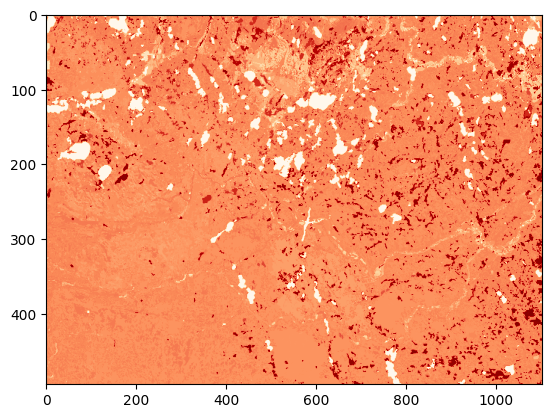

Layer aws5_20


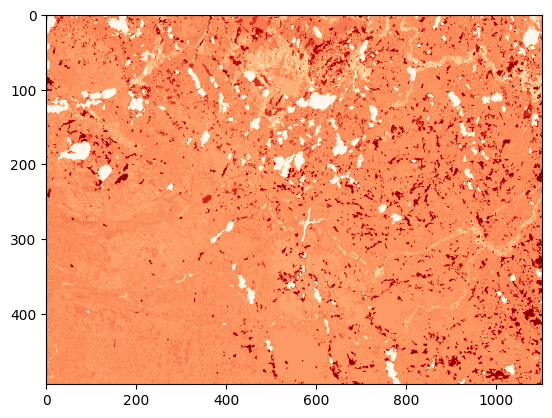

Layer aws20_50


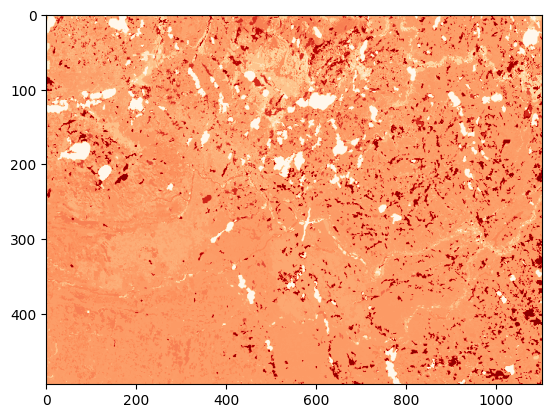

In [6]:
area_of_interest = {
    "type": "Polygon",
    "coordinates": [
        [
            [
                -95.00976562499999,
                44.653024159812
            ],
            [
                -93.8671875,
                44.653024159812
            ],
            [
                -93.8671875,
                45.19752230305682
            ],
            [
                -95.00976562499999,
                45.19752230305682
            ],
            [
                -95.00976562499999,
                44.653024159812
            ]
        ]
    ]
}
for obj in objects_of_interest:
    object = obj['id']
    res = s.post(f'{base}/gssurgo/object/{object}/raster', json=area_of_interest)
    raster = res.content
    print("Layer", obj['name'])
    with rasterio.MemoryFile(raster) as memfile:
        with memfile.open() as dataset:
            data = dataset.read(1)
            plt.imshow(data, cmap='OrRd', aspect='auto')
            plt.show()

### Access summary stats
We then use the same IDs from `objects_of_interest` to access summary stats for available water storage for an arbitrary polygon over Minnesota.

In [7]:
for obj in objects_of_interest:
    object = obj['id']
    print('Layer', obj['name'])
    res = s.post(f'{base}/gssurgo/object/{object}/stats', json=area_of_interest)
    display(pd.json_normalize(res.json()))

Layer aws0_5


,count,sum,mean,stddev,min,max
0,522306,5.231628e+06,10.016405,2.472596,1.6,20.0


Layer aws5_20


,count,sum,mean,stddev,min,max
0,522306,1.566051e+07,29.983393,7.436063,4.8,60.0


Layer aws20_50


,count,sum,mean,stddev,min,max
0,522306,2.976822e+07,56.993839,15.863336,7.98,120.0
